# 1. Read our data in Pandas

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
import warnings
warnings.filterwarnings('ignore')

# 2. Select columns for X, y

In [2]:
X = df[['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# 3. Train/Test split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 4. Exploratory Data Analysis

In [4]:
survived = df.groupby('Survived').size().plot(kind='bar')
survived

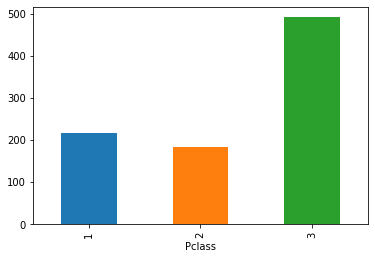

In [5]:
ticketclass = df.groupby('Pclass').size().plot(kind='bar')

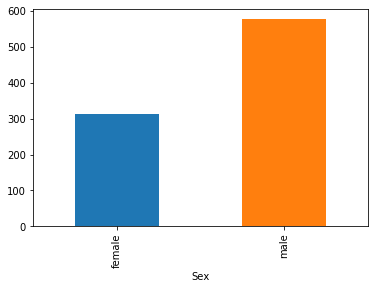

In [6]:
gender = df.groupby('Sex').size().plot(kind='bar')

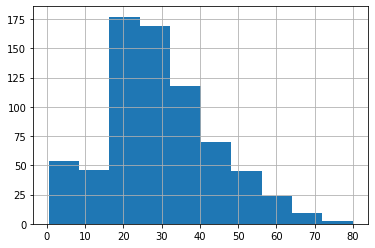

In [7]:
ages = df['Age'].hist()

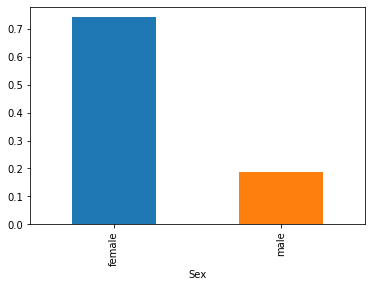

In [8]:
df.groupby('Sex')['Survived'].mean().plot.bar()

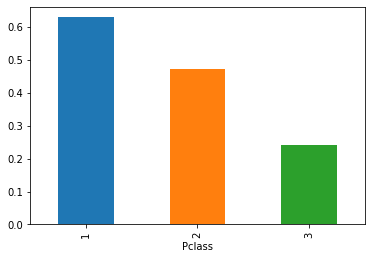

In [9]:
df.groupby('Pclass')['Survived'].mean().plot.bar()

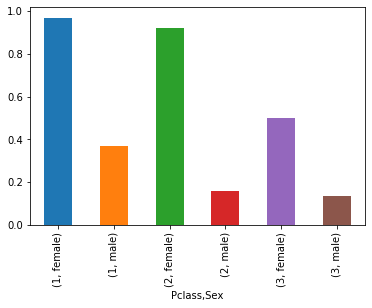

In [10]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().plot.bar()

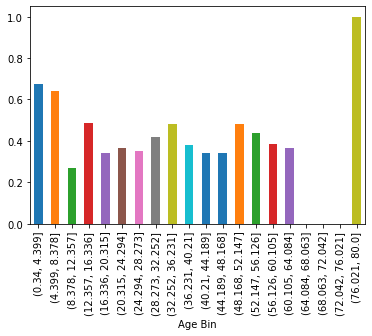

In [11]:
df['Age Bin'] = pd.cut(df['Age'], bins=20)
df.groupby('Age Bin')['Survived'].mean().plot.bar()

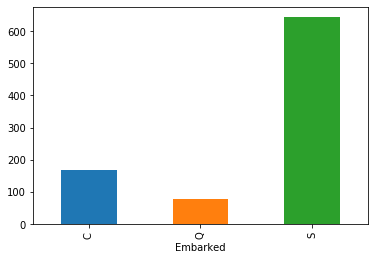

In [12]:
embarks = df.groupby('Embarked').size().plot(kind='bar')
embarks

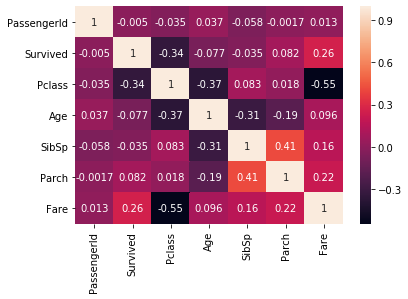

In [13]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

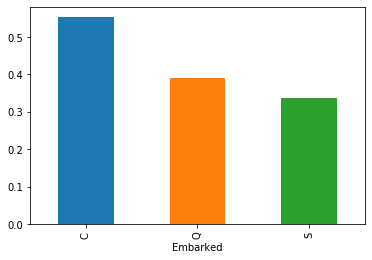

In [14]:
df.groupby('Embarked')['Survived'].mean().plot.bar()

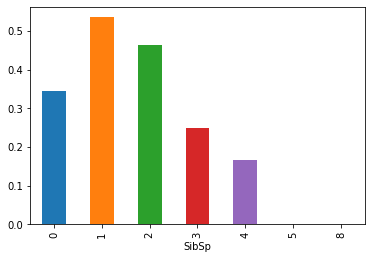

In [15]:
df.groupby('SibSp')['Survived'].mean().plot.bar()

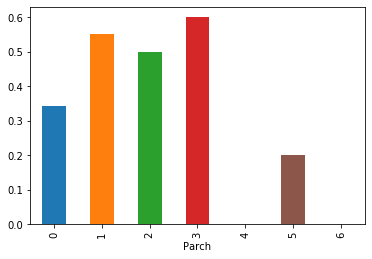

In [16]:
df.groupby('Parch')['Survived'].mean().plot.bar()

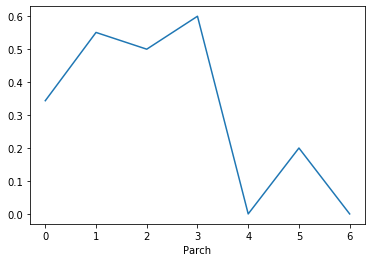

In [17]:
df.groupby('Parch')['Survived'].mean().plot()

# 5. Feature Engineering

In [18]:
X_train

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
298,299,1,"Saalfeld, Mr. Adolphe",male,0,0,30.5000,S
884,885,3,"Sutehall, Mr. Henry Jr",male,0,0,7.0500,S
247,248,2,"Hamalainen, Mrs. William (Anna)",female,0,2,14.5000,S
478,479,3,"Karlsson, Mr. Nils August",male,0,0,7.5208,S
305,306,1,"Allison, Master. Hudson Trevor",male,1,2,151.5500,S
316,317,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,1,0,26.0000,S
2,3,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
405,406,2,"Gale, Mr. Shadrach",male,1,0,21.0000,S
742,743,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,2,2,262.3750,C
260,261,3,"Smith, Mr. Thomas",male,0,0,7.7500,Q


In [19]:
#Feature Engineering on X_train
import numpy as np
sex = {'female': 1, 'male': 2}
X_train.Sex = [sex[item] for item in X_train.Sex]

#X_train.dropna(subset=['Embarked'], inplace=True)
#values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
#df.fillna(value=values)
X_train.fillna('S', inplace=True)
embarked = {'C': 1, 'Q': 2, 'S': 3}
X_train.Embarked = [embarked[item] for item in X_train.Embarked]

#FOUND THE SINGLE TITLES IN ANOTHER JUPYTER NOTEBOOK

titles = {0: 'Mr.',
 1: 'Rev.',
 2: 'Major.',
 3: 'Capt.',
 4: 'Don.',
 5: 'Col.',
 6: 'Jonkheer.',
 7: 'Ms.',
 8: 'Master.',
 9: 'Mlle.',
 10: 'Mme.',
 11: 'Miss.',
 12: 'Dr.',
 13: 'Mrs.', 
 14: 'Countess', 
 15: 'Sir',
 16: 'Lady'}

for idx, row in X_train.iterrows():
    for key, value in titles.items():
        if value in row.Name:
            print(value in row.Name, row.Name)
            X_train.loc[idx, 'Name'] = key
            break
            
X_train.drop(columns=['PassengerId', 'Fare'], inplace=True)

True Saalfeld, Mr. Adolphe
True Sutehall, Mr. Henry Jr
True Hamalainen, Mrs. William (Anna)
True Karlsson, Mr. Nils August
True Allison, Master. Hudson Trevor
True Kantor, Mrs. Sinai (Miriam Sternin)
True Heikkinen, Miss. Laina
True Gale, Mr. Shadrach
True Ryerson, Miss. Susan Parker "Suzette"
True Smith, Mr. Thomas
True Moussa, Mrs. (Mantoura Boulos)
True Smiljanic, Mr. Mile
True Ohman, Miss. Velin
True Stone, Mrs. George Nelson (Martha Evelyn)
True Turja, Miss. Anna Sofia
True Bidois, Miss. Rosalie
True Kirkland, Rev. Charles Leonard
True Johnson, Mr. William Cahoone Jr
True Louch, Mrs. Charles Alexander (Alice Adelaide Slow)
True Lahoud, Mr. Sarkis
True Oreskovic, Miss. Marija
True Lemberopolous, Mr. Peter L
True Vanden Steen, Mr. Leo Peter
True Maisner, Mr. Simon
True Jonkoff, Mr. Lalio
True Perkin, Mr. John Henry
True Peuchen, Major. Arthur Godfrey
True Dowdell, Miss. Elizabeth
True Navratil, Mr. Michel ("Louis M Hoffman")
True Flynn, Mr. James
True Sirayanian, Mr. Orsen
True Frau

True Aubart, Mme. Leontine Pauline
True Graham, Mrs. William Thompson (Edith Junkins)
True Hansen, Mr. Henry Damsgaard
True Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)
True Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)
True Hays, Miss. Margaret Bechstein
True Yousif, Mr. Wazli
True Lennon, Mr. Denis
True Dimic, Mr. Jovan
True Wiklund, Mr. Jakob Alfred
True Hirvonen, Miss. Hildur E
True Garside, Miss. Ethel
True Asplund, Master. Edvin Rojj Felix
True Lurette, Miss. Elise
True Dooley, Mr. Patrick
True Stranden, Mr. Juho
True Moss, Mr. Albert Johan
True Duran y More, Miss. Asuncion
True Goodwin, Master. William Frederick
True Eitemiller, Mr. George Floyd
True Harrison, Mr. William
True Doharr, Mr. Tannous
True Petranec, Miss. Matilda
True Reynaldo, Ms. Encarnacion
True Hagland, Mr. Konrad Mathias Reiersen
True Dakic, Mr. Branko
True Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)
True Jensen, Mr. Hans Peder
True Ling, Mr. Lee
True Leona

True Hamalainen, Master. Viljo
True Chip, Mr. Chang
True Shorney, Mr. Charles Joseph
True Simmons, Mr. John
True Zabour, Miss. Thamine
True Rush, Mr. Alfred George John
True Dick, Mr. Albert Adrian
True Anderson, Mr. Harry
True Leeni, Mr. Fahim ("Philip Zenni")
True Ayoub, Miss. Banoura
True Backstrom, Mr. Karl Alfred
True Gustafsson, Mr. Johan Birger
True McKane, Mr. Peter David
True Carlsson, Mr. August Sigfrid
True Jacobsohn, Mr. Sidney Samuel
True Allen, Mr. William Henry
True Skoog, Miss. Margit Elizabeth
True Osman, Mrs. Mara
True Murphy, Miss. Margaret Jane
True Ivanoff, Mr. Kanio
True Beane, Mrs. Edward (Ethel Clarke)
True Oreskovic, Mr. Luka
True Goodwin, Mr. Charles Edward
True Doling, Mrs. John T (Ada Julia Bone)
True Mannion, Miss. Margareth
True Kelly, Miss. Mary
True Widegren, Mr. Carl/Charles Peter
True O'Sullivan, Miss. Bridget Mary
True O'Driscoll, Miss. Bridget
True Glynn, Miss. Mary Agatha
True Vande Walle, Mr. Nestor Cyriel
True Sobey, Mr. Samuel James Hayden
True F

# 6. Build/Train Model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
m = LogisticRegression()

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 6), (223, 8), (668,), (223,))

X_train

In [23]:
m.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
m.score(X_train, y_train)

0.8263473053892215

In [25]:
#Feature Engineering on X_test
import numpy as np
sex = {'female': 1, 'male': 2}
X_test.Sex = [sex[item] for item in X_test.Sex]

#X_train.dropna(subset=['Embarked'], inplace=True)
#values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
#df.fillna(value=values)
X_test.fillna('S', inplace=True)
embarked = {'C': 1, 'Q': 2, 'S': 3}
X_test.Embarked = [embarked[item] for item in X_test.Embarked]

#FOUND THE SINGLE TITLES IN ANOTHER JUPYTER NOTEBOOK

titles = {0: 'Mr.',
 1: 'Rev.',
 2: 'Major.',
 3: 'Capt.',
 4: 'Don.',
 5: 'Col.',
 6: 'Jonkheer.',
 7: 'Ms.',
 8: 'Master.',
 9: 'Mlle.',
 10: 'Mme.',
 11: 'Miss.',
 12: 'Dr.',
 13: 'Mrs.', 
 14: 'Countess', 
 15: 'Sir',
 16: 'Lady'}

for idx, row in X_test.iterrows():
    for key, value in titles.items():
        if value in row.Name:
            print(value in row.Name, row.Name)
            X_test.loc[idx, 'Name'] = key
            break
            
X_test.drop(columns=['PassengerId', 'Fare'], inplace=True)

True Moubarek, Master. Halim Gonios ("William George")
True Kvillner, Mr. Johan Henrik Johannesson
True Alhomaki, Mr. Ilmari Rudolf
True Harper, Miss. Annie Jessie "Nina"
True Nicola-Yarred, Miss. Jamila
True Barber, Miss. Ellen "Nellie"
True Kelly, Miss. Anna Katherine "Annie Kate"
True Vander Planke, Mr. Leo Edmondus
True Carr, Miss. Helen "Ellen"
True Newsom, Miss. Helen Monypeny
True Futrelle, Mr. Jacques Heath
True Kelly, Mr. James
True Lefebre, Miss. Jeannie
True Attalah, Mr. Sleiman
True Fox, Mr. Stanley Hubert
True Lines, Miss. Mary Conover
True Kimball, Mr. Edwin Nelson Jr
True O'Leary, Miss. Hanora "Norah"
True Montvila, Rev. Juozas
True Porter, Mr. Walter Chamberlain
True Mineff, Mr. Ivan
True Seward, Mr. Frederic Kimber
True Andersen-Jensen, Miss. Carla Christine Nielsine
True Olsvigen, Mr. Thor Anderson
True Risien, Mr. Samuel Beard
True Skoog, Master. Karl Thorsten
True Uruchurtu, Don. Manuel E
True Wilhelms, Mr. Charles
True Skoog, Master. Harald
True Olsson, Miss. Elina

In [26]:
m.score(X_test, y_test)

0.8116591928251121

In [27]:
X_train.head()

,Pclass,Name,Sex,SibSp,Parch,Embarked
298,1,0,2,0,0,3
884,3,0,2,0,0,3
247,2,13,1,0,2,3
478,3,0,2,0,0,3
305,1,8,2,1,2,3


# 7. Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
acc = cross_val_score(m, X_train, y_train, cv=10)

In [30]:
acc

array([0.88235294, 0.70588235, 0.80882353, 0.91044776, 0.85074627,
       0.75757576, 0.75757576, 0.84848485, 0.77272727, 0.90909091])

In [31]:
acc.mean()

0.8203707398834703

In [32]:
df_test = pd.read_csv('test.csv')

In [33]:
#Feature Engineering on df_test
import numpy as np
sex = {'female': 1, 'male': 2}
df_test.Sex = [sex[item] for item in df_test.Sex]

#X_train.dropna(subset=['Embarked'], inplace=True)
#values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
#df.fillna(value=values)
df_test.fillna('S', inplace=True)
embarked = {'C': 1, 'Q': 2, 'S': 3}
df_test.Embarked = [embarked[item] for item in df_test.Embarked]

#FOUND THE SINGLE TITLES IN ANOTHER JUPYTER NOTEBOOK

titles = {0: 'Mr.',
 1: 'Rev.',
 2: 'Major.',
 3: 'Capt.',
 4: 'Don.',
 5: 'Col.',
 6: 'Jonkheer.',
 7: 'Ms.',
 8: 'Master.',
 9: 'Mlle.',
 10: 'Mme.',
 11: 'Miss.',
 12: 'Dr.',
 13: 'Mrs.', 
 14: 'Countess', 
 15: 'Sir',
 16: 'Lady', 17:'Dona.'}

for idx, row in df_test.iterrows():
    for key, value in titles.items():
        if value in row.Name:
            print(value in row.Name, row.Name)
            df_test.loc[idx, 'Name'] = key
            break
            
df_test.drop(columns=['PassengerId', 'Fare', 'Age', 'Ticket', 'Cabin'], inplace=True)

True Kelly, Mr. James
True Wilkes, Mrs. James (Ellen Needs)
True Myles, Mr. Thomas Francis
True Wirz, Mr. Albert
True Hirvonen, Mrs. Alexander (Helga E Lindqvist)
True Svensson, Mr. Johan Cervin
True Connolly, Miss. Kate
True Caldwell, Mr. Albert Francis
True Abrahim, Mrs. Joseph (Sophie Halaut Easu)
True Davies, Mr. John Samuel
True Ilieff, Mr. Ylio
True Jones, Mr. Charles Cresson
True Snyder, Mrs. John Pillsbury (Nelle Stevenson)
True Howard, Mr. Benjamin
True Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)
True del Carlo, Mrs. Sebastiano (Argenia Genovesi)
True Keane, Mr. Daniel
True Assaf, Mr. Gerios
True Ilmakangas, Miss. Ida Livija
True Assaf Khalil, Mrs. Mariana (Miriam")"
True Rothschild, Mr. Martin
True Olsen, Master. Artur Karl
True Flegenheim, Mrs. Alfred (Antoinette)
True Williams, Mr. Richard Norris II
True Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
True Robins, Mr. Alexander A
True Ostby, Miss. Helene Ragnhild
True Daher, Mr. Shedid
True Brady, Mr. John Bertr

True Nilsson, Mr. August Ferdinand
True Wells, Mrs. Arthur Henry (Addie" Dart Trevaskis)"
True Klasen, Miss. Gertrud Emilia
True Portaluppi, Mr. Emilio Ilario Giuseppe
True Lyntakoff, Mr. Stanko
True Chisholm, Mr. Roderick Robert Crispin
True Warren, Mr. Charles William
True Howard, Miss. May Elizabeth
True Pokrnic, Mr. Mate
True McCaffry, Mr. Thomas Francis
True Fox, Mr. Patrick
True Clark, Mrs. Walter Miller (Virginia McDowell)
True Lennon, Miss. Mary
True Saade, Mr. Jean Nassr
True Bryhl, Miss. Dagmar Jenny Ingeborg 
True Parker, Mr. Clifford Richard
True Faunthorpe, Mr. Harry
True Ware, Mr. John James
True Oxenham, Mr. Percy Thomas
True Oreskovic, Miss. Jelka
True Peacock, Master. Alfred Edward
True Fleming, Miss. Honora
True Touma, Miss. Maria Youssef
True Rosblom, Miss. Salli Helena
True Dennis, Mr. William
True Franklin, Mr. Charles (Charles Fardon)
True Snyder, Mr. John Pillsbury
True Mardirosian, Mr. Sarkis
True Ford, Mr. Arthur
True Rheims, Mr. George Alexander Lucien
True Da

In [34]:
df_test.head()

,Pclass,Name,Sex,SibSp,Parch,Embarked
0,3,0,2,0,0,2
1,3,13,1,1,0,3
2,2,0,2,0,0,2
3,3,0,2,0,0,3
4,3,13,1,1,1,3


In [61]:
m.predict(df_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [63]:
pred_list = (m.predict(df_test)).tolist()

In [71]:
get_passengerid = pd.read_csv('test.csv')

In [75]:
csv_final = {'PassengerId': get_passengerid['PassengerId'],
             'Survived': pred_list}

In [78]:
csv_ultrafinal = pd.DataFrame(csv_final,columns= ['PassengerId', 'Survived'])

In [83]:
csv_ultrafinal.set_index('PassengerId', inplace=True)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [84]:
csv_ultrafinal.to_csv(r'carol_titanic_prediction.csv')